# HAND WRITTEN DIGIT RECOGNITION :-

In [1]:
#importing the libraries
import matplotlib.pyplot as plt #for displaying images
import matplotlib.image as mpimg
import numpy as np #numpy arrays
import os #for importing directories
import PIL #for images
import tensorflow as tf

from tensorflow import keras #keras api is being used
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential #for sequential creation of layers

# Preparing Dataset :-

In [2]:
(train_img,train_label), (test_img,test_label) = datasets.mnist.load_data()

print(train_img.shape) #for seeing the shape of the train data set
print(train_label.shape) 
print(test_img.shape)  #for seeing the shape of the test data set
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#There are 60000 training and 10000 test set
#size of the image is 28*28

In [4]:
#Now reshaping the images
train_img = train_img.reshape((60000,28,28,1))
test_img = test_img.reshape((10000,28,28,1))
#reshaped into 4D as it will be easier to build convolutional layes in Keras

In [5]:
#Normalizing pixel values between 0 and 1
train_img, test_img = train_img/255.0, test_img/255.0

print('Train Image: ', train_img.shape)
print('Test Image: ', test_img.shape)

Train Image:  (60000, 28, 28, 1)
Test Image:  (10000, 28, 28, 1)


In [6]:
np.unique(train_label,return_counts=False)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
np.unique(test_label,return_counts=False)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
#Total 10 classes in the label set

In [9]:
digits = 10 #different classes
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(28,28,1)),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

# MODEL : -

In [10]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

# Training Model

In [12]:
epochs = 10 # no of batches of images = (Total Images)/no of epochs
history = model.fit(
    train_img,
    train_label,
    epochs = epochs
)

Epoch 1/10
1875/1875 [==============================] - 159s 85ms/step - loss: 1.5199 - accuracy: 0.9398
Epoch 2/10
1875/1875 [==============================] - 170s 90ms/step - loss: 1.4814 - accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 168s 90ms/step - loss: 1.4770 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 162s 86ms/step - loss: 1.4766 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 152s 81ms/step - loss: 1.4748 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 171s 91ms/step - loss: 1.4740 - accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 164s 88ms/step - loss: 1.4752 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 167s 89ms/step - loss: 1.4745 - accuracy: 0.9805
Epoch 9/10
1875/1875 [==============================] - 172s 92ms/step - loss: 1.4739 - accuracy: 0.9806
Epoch 10/10
1875/1875 [==============================] 

# Visualizing the Training Data

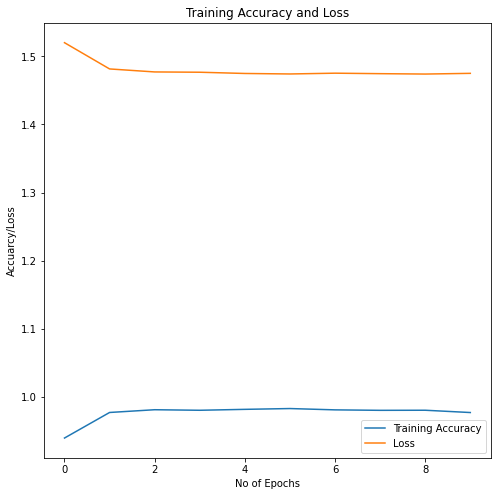

In [13]:
accuracy = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.plot(epochs_range,accuracy,label='Training Accuracy')
plt.plot(epochs_range,loss,label='Loss')
plt.legend(loc ='lower right')
plt.title('Training Accuracy and Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Accuarcy/Loss')
plt.show()

# Test Image

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted Number :7


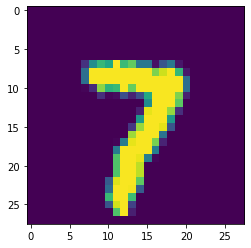

In [14]:
image = (test_img[86]).reshape(1,28,28,1)
model_predicted = model.predict_classes(image,verbose=0)
plt.imshow(image.reshape(28,28))
print(f'predicted Number :{model_predicted[0]}')

# SAVING THE MODEL: -

In [15]:
model.save("digit_cnn-model.h5")

# Load Model:- 

predicted Number :2


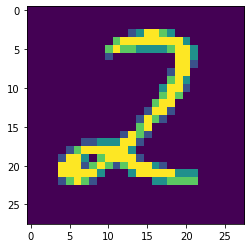

In [16]:
loaded_model = models.load_model("digit_cnn-model.h5")

#After loading the model
image = (test_img[477]).reshape(1,28,28,1)
model_predicted = loaded_model.predict_classes(image,verbose=0)
plt.imshow(image.reshape(28,28))
print(f'predicted Number :{model_predicted[0]}')

# ACCURACY

In [22]:
acc =0;
for i in range(len(test_img)):
    image = (test_img[i]).reshape(1,28,28,1)
    model_predicted = loaded_model.predict_classes(image,verbose=0)
    if(test_label[i]==model_predicted[0]):
        acc+=1;
print(f'Accuracy is :{acc/len(test_img)}')

Accuracy is :0.9815
